# Dyadic Regularities in Prime Distribution (Empirical)

**Goal.** Provide a *minimal, reproducible* empirical exploration of prime counts and within-band structure on dyadic intervals
\([2^{k}, 2^{k+1})\).

**What this notebook is (and is not).**
- ✅ It is an empirical report: definitions, measurements, plots, sanity checks.
- ❌ It is **not** a proof or a claim of solving a major conjecture.

**Primary questions for readers**
1. Are these dyadic-normalized fluctuation patterns already known / named in analytic number theory?
2. Are the within-band position patterns (relative coordinates) consistent with standard heuristics once conditioning on \([2^k, 2^{k+1})\)?
3. If something here is trivial or a known artifact, what is the correct reference / explanation?

_Licensed under MIT - Last updated: 2026-01-14_


## 0) Reproducibility & dependencies

This notebook uses only common Python scientific libraries plus `sympy` for prime enumeration.


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import primerange, primepi


## 1) Definitions

For an integer \(k \ge 1\), define the dyadic interval

\[ I_k = [2^k, 2^{k+1}) \]

We measure:
- **Prime count**: \(\pi(2^{k+1}-1) - \pi(2^k-1)\)
- **Raw density**: count / width, where width = \(2^k\)
- **Log-normalized density**: density · log(midpoint), where midpoint = \(\tfrac{2^k + 2^{k+1}}{2}\)
- **Residual vs PNT proxy**: compare count to \(\text{width}/\log(\text{midpoint})\)

Within-band structure:
- For each prime \(p \in I_k\), define relative coordinate
\[ x = \frac{p - 2^k}{2^k} \in [0,1) \]
We can histogram \(x\) to see how prime locations populate the unit interval after dyadic rescaling.


In [3]:
def dyadic_interval(k: int):
    lo = 1 << k
    hi = (1 << (k + 1)) - 1  # inclusive upper endpoint for counting
    width = 1 << k
    mid = (lo + (1 << (k + 1))) / 2
    return lo, hi, width, mid

def primes_in_interval(lo: int, hi_inclusive: int):
    # sympy.primerange is half-open [a, b); we pass hi+1
    return list(primerange(lo, hi_inclusive + 1))

def count_primes_in_interval(lo: int, hi_inclusive: int):
    # Use primepi for fast counts; careful with endpoints
    return int(primepi(hi_inclusive) - primepi(lo - 1))


## 2) Choose a computational horizon

Pick `k_min`, `k_max` based on your machine/time.  
Tip: start modest (e.g., up to 24–26), then increase if needed.


In [4]:
k_min = 6
k_max = 24

ks = list(range(k_min, k_max + 1))
len(ks), (ks[0], ks[-1])

(19, (6, 24))

## 3) Prime counts & densities per dyadic band

We compute counts with `primepi` (fast), then compare to a standard proxy from PNT: \(\text{width}/\log(\text{mid})\).


In [5]:
rows = []
for k in ks:
    lo, hi, width, mid = dyadic_interval(k)
    cnt = count_primes_in_interval(lo, hi)
    proxy = width / math.log(mid)
    density = cnt / width
    log_norm = density * math.log(mid)
    residual = (cnt - proxy) / proxy  # relative residual
    rows.append({
        "k": k,
        "lo": lo,
        "hi": hi,
        "width": width,
        "mid": mid,
        "prime_count": cnt,
        "proxy_width_over_logmid": proxy,
        "raw_density": density,
        "log_normalized_density": log_norm,
        "relative_residual_vs_proxy": residual,
    })

df = pd.DataFrame(rows)
df.head()

,k,lo,hi,width,mid,prime_count,proxy_width_over_logmid,raw_density,log_normalized_density,relative_residual_vs_proxy
0,6,64,127,64,96.0,13,14.021717,0.203125,0.927133,-0.072867
1,7,128,255,128,192.0,23,24.346194,0.179688,0.944706,-0.055294
2,8,256,511,256,384.0,43,43.020564,0.167969,0.999522,-0.000478
3,9,512,1023,512,768.0,75,77.064450,0.146484,0.973211,-0.026789
4,10,1024,2047,1024,1536.0,137,139.567780,0.133789,0.981602,-0.018398


### 3.1 Table snapshot

In [6]:
df[["k","lo","hi","prime_count","proxy_width_over_logmid","log_normalized_density","relative_residual_vs_proxy"]].tail(10)

,k,lo,hi,prime_count,proxy_width_over_logmid,log_normalized_density,relative_residual_vs_proxy
9,15,32768,65535,3030,3033.323378,0.998904,-0.001096
10,16,65536,131071,5709,5700.854747,1.001429,0.001429
11,17,131072,262143,10749,10753.331114,0.999597,-0.000403
12,18,262144,524287,20390,20349.454500,1.001992,0.001992
13,19,524288,1048575,38635,38620.839717,1.000367,0.000367
14,20,1048576,2097151,73586,73489.344231,1.001315,0.001315
15,21,2097152,4194303,140336,140169.379043,1.001189,0.001189
16,22,4194304,8388607,268216,267926.129193,1.001082,0.001082
17,23,8388608,16777215,513708,513132.177386,1.001122,0.001122
18,24,16777216,33554431,985818,984520.774535,1.001318,0.001318


### 3.2 Plots

- Prime count grows with width.
- Raw density decays.
- Log-normalized density should hover around ~1 (roughly) if the proxy is appropriate; deviations show band-level fluctuation.


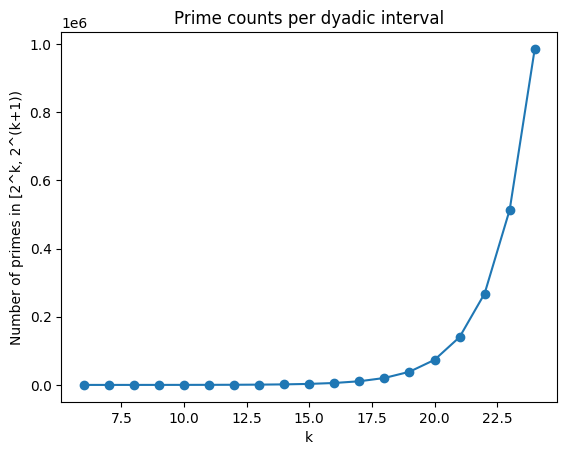

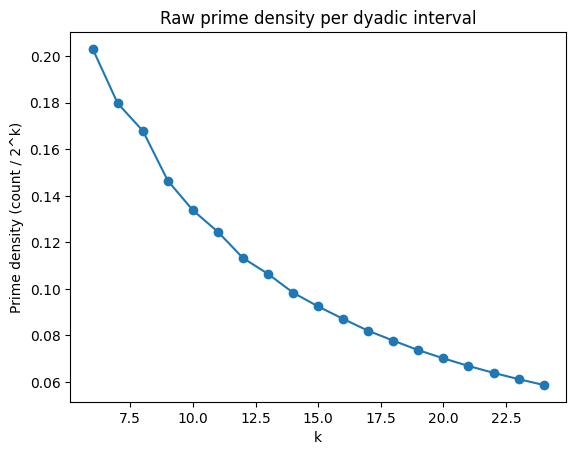

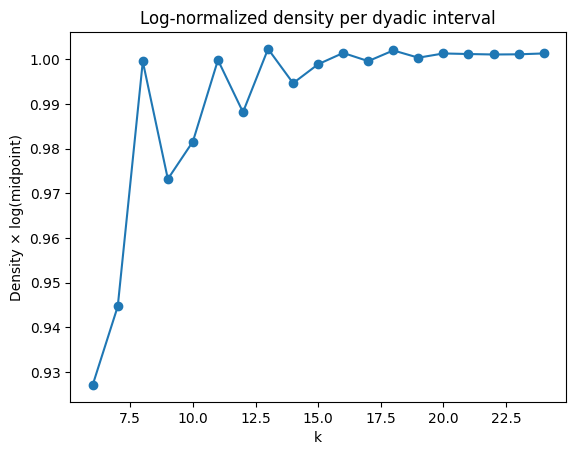

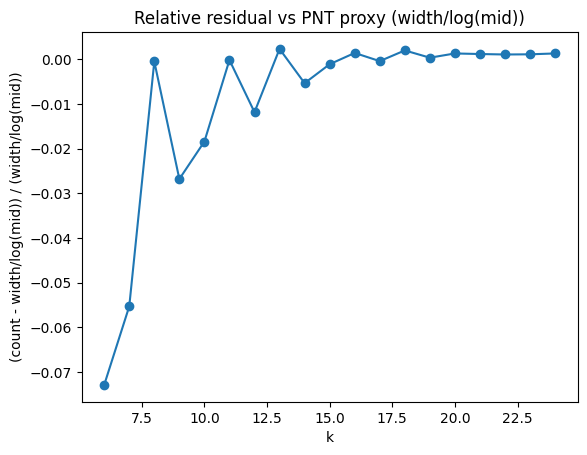

In [7]:
plt.figure()
plt.plot(df["k"], df["prime_count"], marker="o")
plt.xlabel("k")
plt.ylabel("Number of primes in [2^k, 2^(k+1))")
plt.title("Prime counts per dyadic interval")
plt.show()

plt.figure()
plt.plot(df["k"], df["raw_density"], marker="o")
plt.xlabel("k")
plt.ylabel("Prime density (count / 2^k)")
plt.title("Raw prime density per dyadic interval")
plt.show()

plt.figure()
plt.plot(df["k"], df["log_normalized_density"], marker="o")
plt.xlabel("k")
plt.ylabel("Density × log(midpoint)")
plt.title("Log-normalized density per dyadic interval")
plt.show()

plt.figure()
plt.plot(df["k"], df["relative_residual_vs_proxy"], marker="o")
plt.xlabel("k")
plt.ylabel("(count - width/log(mid)) / (width/log(mid))")
plt.title("Relative residual vs PNT proxy (width/log(mid))")
plt.show()

## 4) A compact “fluctuation signature”

To make a single “attention-capturing” plot, we can standardize residuals:

\[ z_k = \frac{\text{count}_k - \text{proxy}_k}{\sqrt{\text{proxy}_k}} \]

This is a crude Poisson-like normalization (not a claim of true Poisson behavior). It helps compare bands on a common scale.


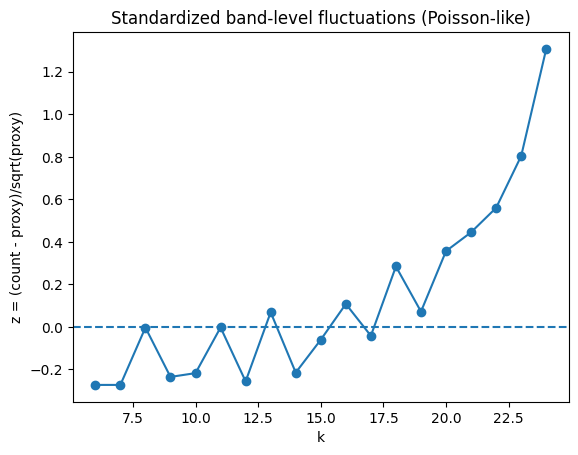

,k,prime_count,proxy_width_over_logmid,z_poisson_like
9,15,3030,3033.323378,-0.060342
10,16,5709,5700.854747,0.107878
11,17,10749,10753.331114,-0.041767
12,18,20390,20349.454500,0.284228
13,19,38635,38620.839717,0.072054
14,20,73586,73489.344231,0.356546
15,21,140336,140169.379043,0.445044
16,22,268216,267926.129193,0.560011
17,23,513708,513132.177386,0.803848
18,24,985818,984520.774535,1.307384


In [8]:
df["z_poisson_like"] = (df["prime_count"] - df["proxy_width_over_logmid"]) / np.sqrt(df["proxy_width_over_logmid"])

plt.figure()
plt.axhline(0, linestyle="--")
plt.plot(df["k"], df["z_poisson_like"], marker="o")
plt.xlabel("k")
plt.ylabel("z = (count - proxy)/sqrt(proxy)")
plt.title("Standardized band-level fluctuations (Poisson-like)")
plt.show()

df[["k","prime_count","proxy_width_over_logmid","z_poisson_like"]].tail(10)

## 5) Within-band structure via dyadic rescaling

For each band \(I_k\), map primes to relative coordinates \(x\in[0,1)\):

\[ x = (p-2^k)/2^k \]

If primes “look random” inside bands after conditioning, histograms of \(x\) should be broadly compatible with a baseline (not necessarily uniform, but we can start there as a null).


In [9]:
def relative_positions_in_band(k: int):
    lo, hi, width, mid = dyadic_interval(k)
    ps = primes_in_interval(lo, hi)
    xs = [(p - lo) / width for p in ps]
    return np.array(xs), ps

# Choose a few representative bands to display
bands_to_show = [k_min, (k_min+k_max)//2, k_max]
bands_to_show

[6, 15, 24]

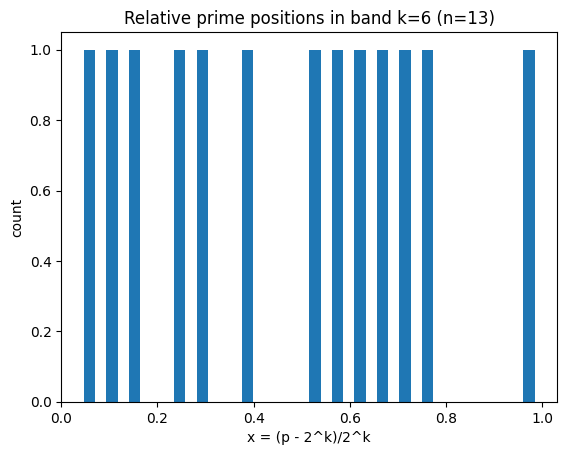

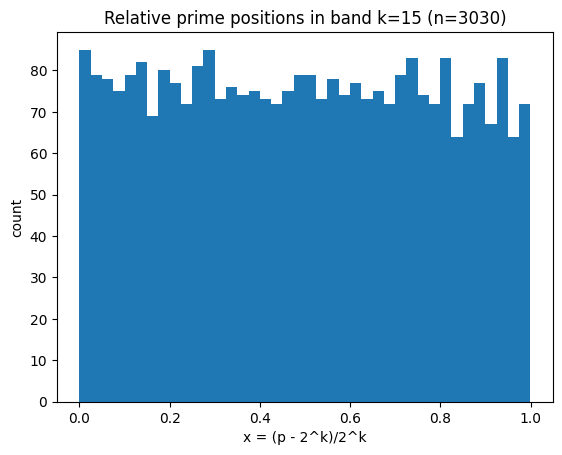

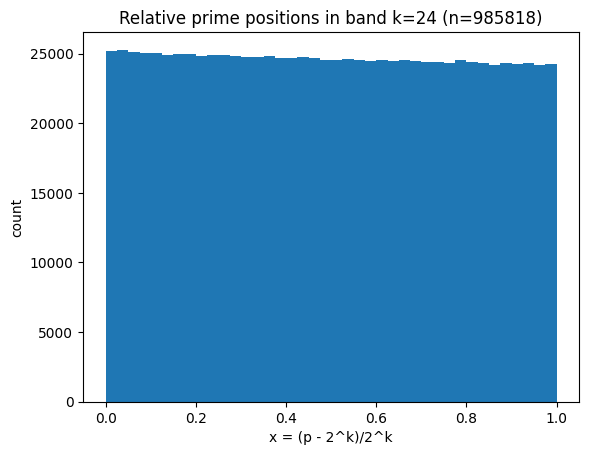

In [10]:
bins = 40
for k in bands_to_show:
    xs, ps = relative_positions_in_band(k)
    plt.figure()
    plt.hist(xs, bins=bins)
    plt.xlabel("x = (p - 2^k)/2^k")
    plt.ylabel("count")
    plt.title(f"Relative prime positions in band k={k} (n={len(xs)})")
    plt.show()

### 5.1 Simple chi-square vs uniform (as a *diagnostic*)

Caution: This is **not** a rigorous statistical test in a strict number-theoretic sense.
It’s a quick diagnostic to see if some bins are consistently over/under populated in an obvious way.


In [11]:
def chisq_vs_uniform(xs: np.ndarray, bins: int = 40):
    counts, _ = np.histogram(xs, bins=bins, range=(0.0, 1.0))
    expected = counts.sum() / bins
    chisq = ((counts - expected) ** 2 / expected).sum() if expected > 0 else np.nan
    return chisq, counts.sum(), expected

diag_rows = []
for k in ks:
    xs, _ = relative_positions_in_band(k)
    chisq, n, expected = chisq_vs_uniform(xs, bins=bins)
    diag_rows.append({"k": k, "n_primes": n, "chisq_uniform": chisq, "expected_per_bin": expected})

diag = pd.DataFrame(diag_rows)
diag.tail()

,k,n_primes,chisq_uniform,expected_per_bin
14,20,73586,19.833718,1839.65
15,21,140336,31.287082,3508.40
16,22,268216,47.759358,6705.40
17,23,513708,82.268246,12842.70
18,24,985818,137.714260,24645.45


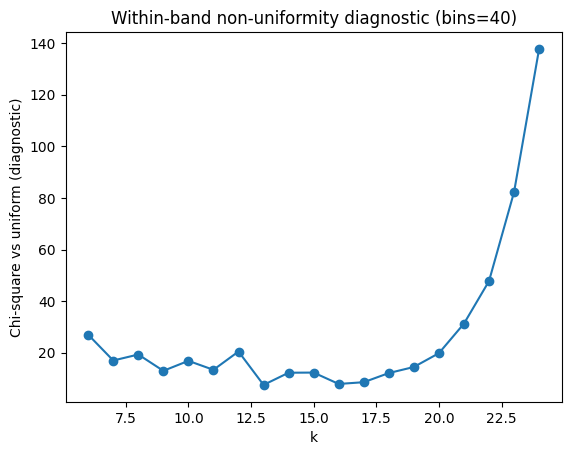

In [12]:
plt.figure()
plt.plot(diag["k"], diag["chisq_uniform"], marker="o")
plt.xlabel("k")
plt.ylabel("Chi-square vs uniform (diagnostic)")
plt.title(f"Within-band non-uniformity diagnostic (bins={bins})")
plt.show()

## 6) Robustness checks (quick)

1. Vary number of bins.
2. Compare multiple adjacent bands.
3. Confirm that results are stable under mild parameter changes.


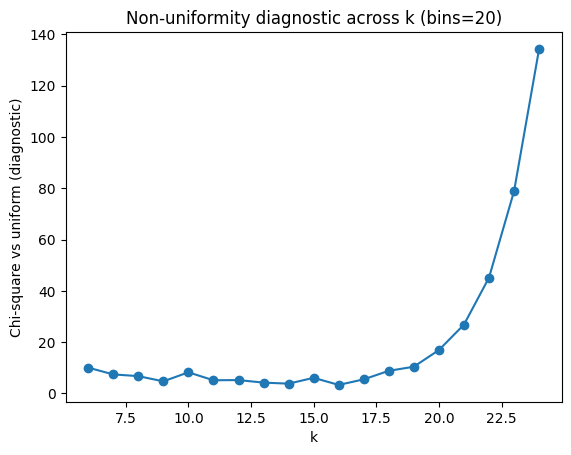

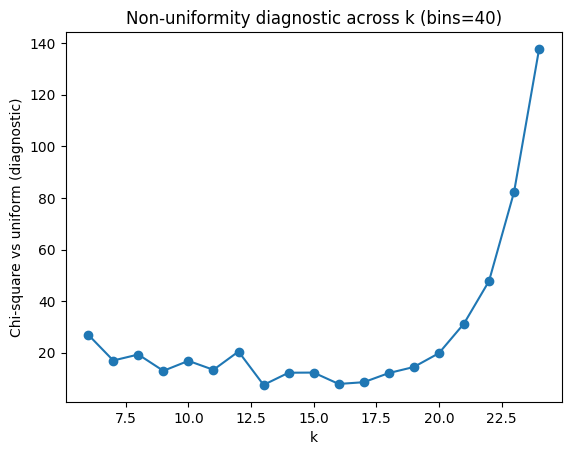

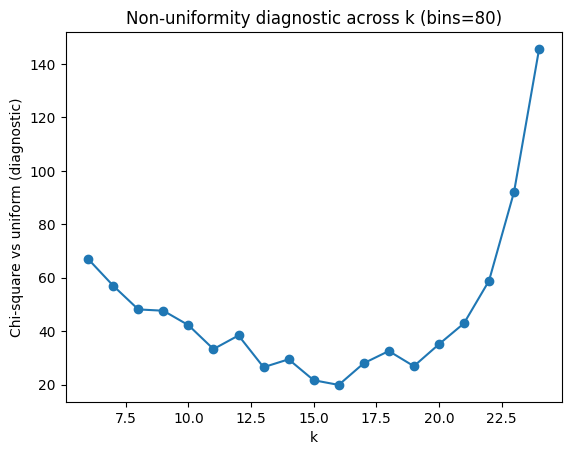

In [13]:
for bins_try in [20, 40, 80]:
    diag_rows = []
    for k in ks:
        xs, _ = relative_positions_in_band(k)
        chisq, n, expected = chisq_vs_uniform(xs, bins=bins_try)
        diag_rows.append({"k": k, "chisq_uniform": chisq})
    d = pd.DataFrame(diag_rows)
    plt.figure()
    plt.plot(d["k"], d["chisq_uniform"], marker="o")
    plt.xlabel("k")
    plt.ylabel("Chi-square vs uniform (diagnostic)")
    plt.title(f"Non-uniformity diagnostic across k (bins={bins_try})")
    plt.show()

## 7) Minimal export for sharing

Save the per-band table to CSV so other people can reproduce without running the prime enumeration.


In [14]:
out_csv = "dyadic_prime_bands.csv"
df.to_csv(out_csv, index=False)
out_csv

'dyadic_prime_bands.csv'

## 8) Reddit-ready summary block (copy/paste)

Use the text below in your Reddit post body. Keep it short; link to this notebook or the CSV.

---

**Title:** Empirical dyadic regularities in prime distribution across powers of two

**Body (suggested):**
I explored prime counts and within-band structure on dyadic intervals \([2^k,2^{k+1})\).  
For each band I computed the prime count and compared it to the proxy \(2^k/\log(\text{mid})\), plus a crude standardized residual \(z=(\text{count}-\text{proxy})/\sqrt{{\text{proxy}}}\).  
I also mapped primes to relative coordinates \(x=(p-2^k)/2^k\in[0,1)\) and looked at histograms / a simple non-uniformity diagnostic.

I’m sharing the notebook + CSV and would appreciate:
1) whether these dyadic-normalized fluctuation patterns are known/named,  
2) whether the within-band position patterns should be expected from standard heuristics,  
3) any references or corrections if this is trivial/artifactual.

---
